In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
start = datetime.datetime(2021,1,1 )
end =datetime.datetime(2022,1,1 )



In [3]:
df_nifty=web.DataReader('^NSEI','yahoo',start,end)
df_nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [4]:
df_bajaj=web.DataReader('BAJFINANCE.NS','yahoo',start,end)
df_bajaj.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5338.000000,5250.000000,5310.200195,5280.149902,1447187.0,5271.631836
2021-01-04,5324.000000,5196.200195,5324.000000,5216.200195,2333659.0,5207.785156
2021-01-05,5224.200195,5062.500000,5218.000000,5119.000000,3953400.0,5110.741699
2021-01-06,5168.350098,4990.299805,5130.000000,5030.299805,3607923.0,5022.184570
2021-01-07,5131.549805,5021.299805,5065.000000,5081.000000,3035750.0,5072.803223


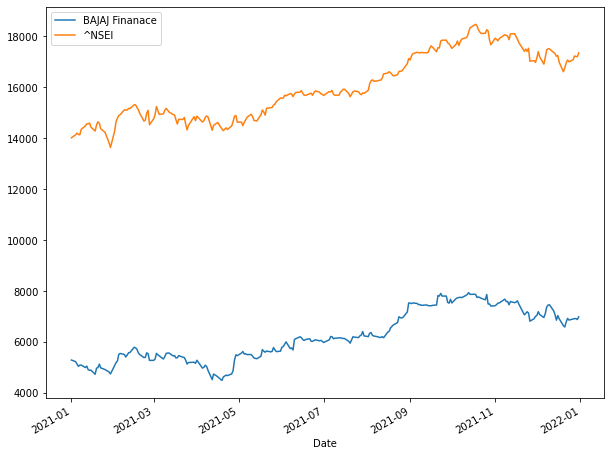

In [5]:
df_bajaj['Close'].plot(label = 'BAJAJ Finanace', figsize=(10,8))
df_nifty['Close'].plot(label = '^NSEI')
plot.legend()

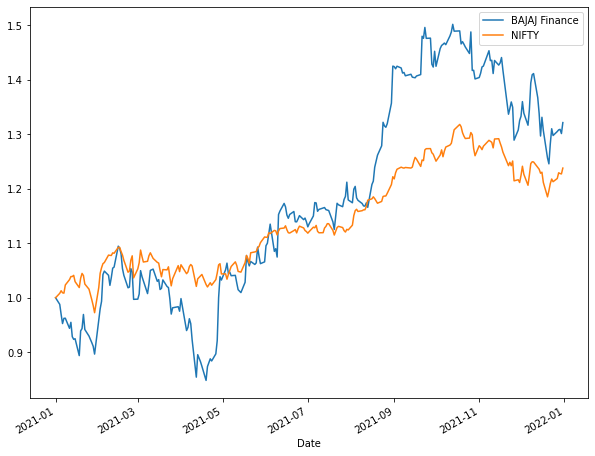

In [6]:
df_bajaj['Cumu'] = df_bajaj['Close']/df_bajaj['Close'].iloc[0]
df_bajaj['Cumu'].plot(label = 'BAJAJ Finance', figsize=(10,8))

df_nifty['Cumu'] = df_nifty['Close']/df_nifty['Close'].iloc[0]
df_nifty['Cumu'].plot(label = 'NIFTY')

plot.legend()

248
248


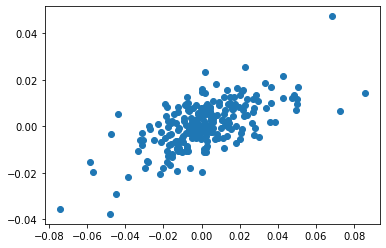

In [7]:
df_bajaj['daily_ret'] = df_bajaj['Close'].pct_change(1) 

df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_nifty['daily_ret']

print(len(df_bajaj['Close'].pct_change(1)))
print(len(df_nifty['Close'].pct_change(1)))
plot.scatter(df_bajaj['daily_ret'] ,df_nifty['daily_ret'] )


In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_bajaj['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])


In [9]:
beta=slope
print(slope)
alpha=intercept

print(intercept)

0.3028960742957344
0.0005058653732726758


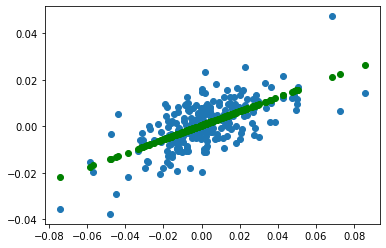

In [25]:
plot.scatter(df_bajaj['daily_ret'],df_nifty['daily_ret'])

y_hat=( beta * df_bajaj['daily_ret']) + alpha


plot.scatter(df_bajaj['daily_ret'], y_hat, color="green" ,)

In [26]:
START=datetime.datetime(2021,9,1)
END=datetime.datetime(2021,9,1)
df_BAJAJ=web.DataReader('BAJFINANCE.NS','yahoo',START,END)

df_BAJAJ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-01,7674.5,7483.350098,7525,7519.600098,2227789,7519.600098


In [12]:
df_NIFTY=web.DataReader('^NSEI','yahoo',START,END)
df_NIFTY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-01,17225.75,17055.050781,17185.599609,17076.25,301900,17076.25


In [13]:
pct_change_nifty_on_1sept = (df_NIFTY['Close'] -df_NIFTY['Open'])/(df_NIFTY['Open'])
print(pct_change_nifty_on_1sept)

Date
2021-09-01   -0.006363
dtype: float64


In [15]:
calculated_pct_change_bajaj_on_1sept = ( beta * pct_change_nifty_on_1sept) + alpha
print(calculated_pct_change_bajaj_on_1sept)

Date
2021-09-01   -0.001421
dtype: float64


In [16]:
expected_close_of_bajaj_on_1sept = df_BAJAJ['Open']*((calculated_pct_change_bajaj_on_1sept) + 1)
print("Actual Close is : ",df_BAJAJ['Close'])
print("Calculated close is :",expected_close_of_bajaj_on_1sept)

Actual Close is :  Date
2021-09-01    7519.600098
Name: Close, dtype: float64
Calculated close is : Date
2021-09-01    7514.303809
dtype: float64
